# Project Overview

# Data Acquisition

In [78]:
# Required Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm

from IPython.display import display_html

In [79]:
df = pd.read_csv('Data/obs_species.csv')

# Analysis

## Overall Native vs Non-Native Species

Number of native plant observations: 4328
Number of non-native plant observations: 3495


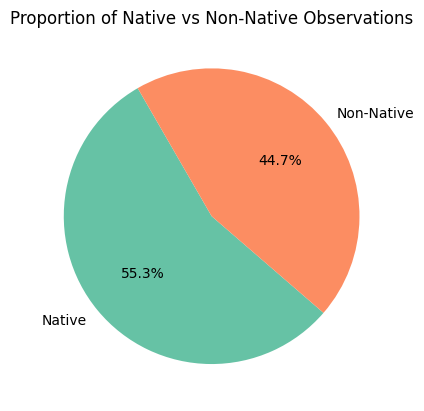

In [80]:
native_counts = df['native'].value_counts().rename({True: 'Native', False: 'Non-Native'})

print(f'Number of native plant observations: {native_counts['Native']}')
print(f'Number of non-native plant observations: {native_counts['Non-Native']}')

colors = ['#66c2a5', '#fc8d62']

plt.pie(native_counts, labels=native_counts.index.astype(str), autopct='%1.1f%%', colors=colors, startangle=120)
plt.title("Proportion of Native vs Non-Native Observations");

## Most Common Native and Non-Native Species

In [81]:
native_obs = df[df['native'] == True]
nonnative_obs = df[df['native'] == False]

native_obs_byspecies = native_obs.groupby(['species', 'common_name']).size().sort_values(ascending=False).to_frame(name='count')
nonnative_obs_byspecies = nonnative_obs.groupby(['species', 'common_name']).size().sort_values(ascending=False).to_frame(name='count')

top10_native = native_obs_byspecies.nlargest(10, 'count')
top10_nonnative = nonnative_obs_byspecies.nlargest(10, 'count')

df1_html = top10_native.to_html()
df2_html = top10_nonnative.to_html()

display_html(f'<div style="display: flex; gap: 50px;"><div>{df1_html}</div><div>{df2_html}</div></div>', raw=True)

,,count
species,common_name,
Ageratina altissima,White snakeroot,119
Verbesina alternifolia,Wingstem,115
Symphyotrichum novae-angliae,New england aster,93
Impatiens capensis,Common jewelweed,90
Solidago caesia,Bluestem goldenrod,86
Asclepias syriaca,Common milkweed,82
Phytolacca americana,American pokeweed,80
Eupatorium serotinum,Late boneset,71
Lobelia cardinalis,Cardinal flower,66


## Most Common Invasive Species

In [82]:
invasive_obs = df[df['invasive'] == True]

invasive_byspecies = invasive_obs.groupby(['species', 'common_name']).size().sort_values(ascending=False).to_frame('count')
display(invasive_byspecies.head(10))

,,count
species,common_name,
Lonicera maackii,Amur honeysuckle,70
Ailanthus altissima,Tree-of-heaven,66
Rosa multiflora,Multiflora rose,41
Lythrum salicaria,Purple loosestrife,35
Dipsacus fullonum,Wild teasel,21
Celastrus orbiculatus,Oriental bittersweet,19
Dipsacus laciniatus,Cutleaf teasel,19
Rhamnus cathartica,Common buckthorn,17
Morus alba,White mulberry,13


## Observations By City

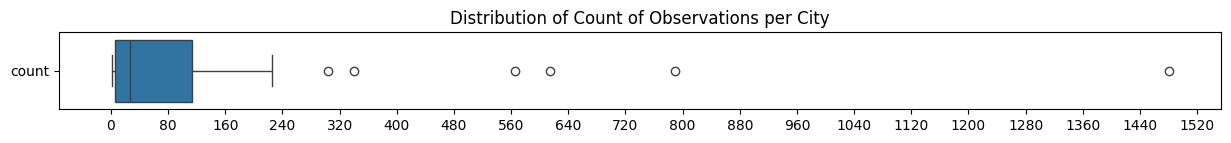

Summary statistics for observations by city


,count
count,77.00
mean,100.79
std,211.64
min,1.00
25%,6.00
50%,27.00
75%,114.00
max,1480.00


In [83]:
city_counts = df.groupby('City').size().to_frame(name='count')

plt.figure(figsize=(15, 1))
sns.boxplot(data=city_counts, orient='h')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=25))
plt.title('Distribution of Count of Observations per City')

plt.show()

print('Summary statistics for observations by city')
display(city_counts.describe().round(2))

### Top 20 Cities for Observations

In [84]:
top20_cities = city_counts.nlargest(20, 'count')
display(top20_cities)

,count
City,
Cleveland,1480
North Olmsted,790
Brecksville,615
Parma,565
Strongsville,340
Walton Hills,304
Cleveland Heights,226
Mayfield,206
Shaker Heights,202


### Number of/Proportion of Native Observations per City

In [85]:

natives_by_city = df.groupby(['City', 'native']).size().to_frame(name='count')

natives_by_city_pivot = natives_by_city.reset_index().pivot_table(index='City', columns='native', values='count', fill_value=0).rename(columns={True: 'Native', False: 'Non-Native'})

merged = natives_by_city_pivot.merge(city_counts, on='City', how='left')

merged['percent_native'] = round((merged['Native'] / merged['count']) * 100,2)

merged = merged[merged['count']> 29]

merged= merged.sort_values(by=['percent_native', 'count'], ascending=False).rename(columns={'count': 'Total'})

display(merged.describe())

display(merged)

,Non-Native,Native,Total,percent_native
count,37.000000,37.000000,37.000000,37.000000
mean,88.837838,110.648649,199.486486,54.627027
std,141.772806,143.212782,274.236072,11.328361
min,10.000000,13.000000,30.000000,26.400000
25%,26.000000,31.000000,62.000000,47.260000
50%,54.000000,54.000000,114.000000,54.390000
75%,77.000000,102.000000,201.000000,63.080000
max,847.000000,633.000000,1480.000000,78.160000


,Non-Native,Native,Total,percent_native
City,,,,
Mayfield,45.0,161.0,206,78.16
Bratenahl,10.0,23.0,33,69.70
Strongsville,104.0,236.0,340,69.41
Brook Park,63.0,138.0,201,68.66
North Olmsted,252.0,538.0,790,68.10
Brecksville,204.0,411.0,615,66.83
Parma Heights,21.0,41.0,62,66.13
Bentleyville,61.0,117.0,178,65.73
Walton Hills,109.0,195.0,304,64.14
